In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1
Considere o conjunto de dados disponível em artificial1d.csv organizado em duas colunas, x e y. Seja um modelo de regressão linear para $\hat{y} = f(x)$.

a. Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados

In [3]:
dataset = np.genfromtxt('./artificial1d.csv', delimiter=',')

X = np.c_[dataset[:, 0]]
y = dataset[:, [1]]

In [11]:
def ols(X, y):
    N = X.shape[0]
    X = np.c_[np.ones(N), X]

    A = X.T @ X
    b = X.T @ y

    w_hat = np.linalg.solve(A, b)

    y_pred = X @ w_hat

    mse = (1/N) * np.sum((y - y_pred) ** 2)

    return w_hat, mse, y_pred

Coeficientes: [[0.06761792]
 [1.57486517]]
MSE: 0.2134


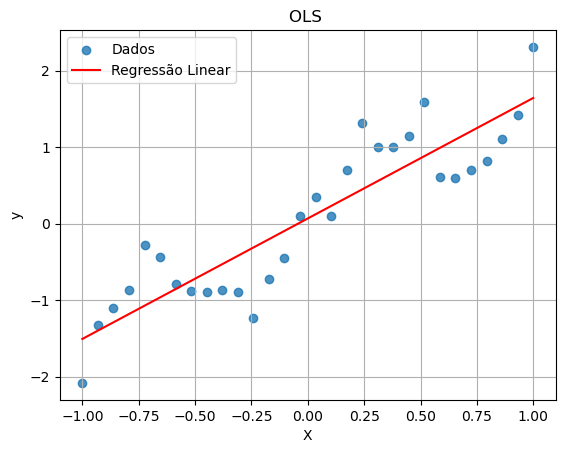

In [13]:
w_hat, mse, y_pred = ols(X, y)

print(f"Coeficientes: {w_hat}")
print(f"MSE: {mse:.4f}")

plt.scatter(X, y, label="Dados", alpha=0.8)
plt.plot(X, y_pred, color='red', label="Regressão Linear")
plt.xlabel("X")
plt.ylabel("y")
plt.title("OLS ")
plt.legend()
plt.grid(True)
plt.show()

b. Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

In [50]:
alpha = 1e-1
num_epochs = 100

def gradient_descent(alpha, num_epochs, X, y):
    N = X.shape[0]

    X_mean, X_std = X.mean(axis=0), X.std(axis=0)
    y_mean, y_std = y.mean(), y.std()

    X_norm = (X - X_mean) / X_std
    y_norm = (y - y_mean) / y_std
    y_norm = y_norm.reshape(-1, 1)

    X_b = np.c_[np.ones((N, 1)), X_norm]
    w = np.random.randn(X_b.shape[1], 1)

    losses = []

    for epoch in range(num_epochs):
        y_pred_norm = X_b @ w
        errors = y_norm - y_pred_norm

        gradients = (1 / N) * (X_b.T @ errors)
        w += alpha * gradients

        y_pred = y_pred_norm * y_std + y_mean
        mse = np.mean((y - y_pred) ** 2)
        losses.append(mse)

        print(f"Época: {epoch}; MSE: {mse:.4f}")

    print("Pesos finais (w):\n", w)
    return w, losses, y_pred

Época: 0; MSE: 0.3487
Época: 1; MSE: 0.3230
Época: 2; MSE: 0.3022
Época: 3; MSE: 0.2853
Época: 4; MSE: 0.2717
Época: 5; MSE: 0.2606
Época: 6; MSE: 0.2516
Época: 7; MSE: 0.2444
Época: 8; MSE: 0.2385
Época: 9; MSE: 0.2337
Época: 10; MSE: 0.2299
Época: 11; MSE: 0.2267
Época: 12; MSE: 0.2242
Época: 13; MSE: 0.2221
Época: 14; MSE: 0.2205
Época: 15; MSE: 0.2191
Época: 16; MSE: 0.2180
Época: 17; MSE: 0.2172
Época: 18; MSE: 0.2164
Época: 19; MSE: 0.2159
Época: 20; MSE: 0.2154
Época: 21; MSE: 0.2150
Época: 22; MSE: 0.2147
Época: 23; MSE: 0.2145
Época: 24; MSE: 0.2143
Época: 25; MSE: 0.2141
Época: 26; MSE: 0.2140
Época: 27; MSE: 0.2139
Época: 28; MSE: 0.2138
Época: 29; MSE: 0.2137
Época: 30; MSE: 0.2136
Época: 31; MSE: 0.2136
Época: 32; MSE: 0.2136
Época: 33; MSE: 0.2135
Época: 34; MSE: 0.2135
Época: 35; MSE: 0.2135
Época: 36; MSE: 0.2135
Época: 37; MSE: 0.2135
Época: 38; MSE: 0.2134
Época: 39; MSE: 0.2134
Época: 40; MSE: 0.2134
Época: 41; MSE: 0.2134
Época: 42; MSE: 0.2134
Época: 43; MSE: 0.213

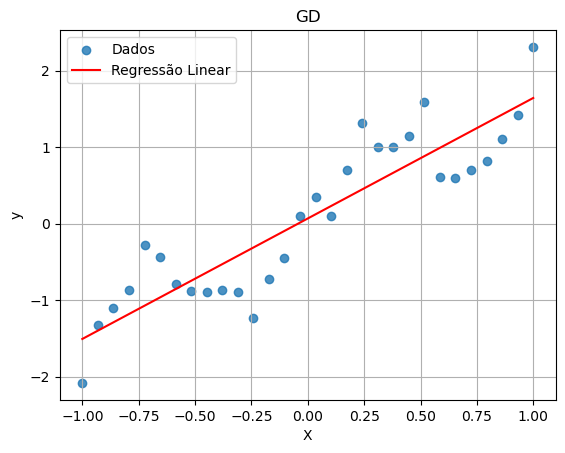

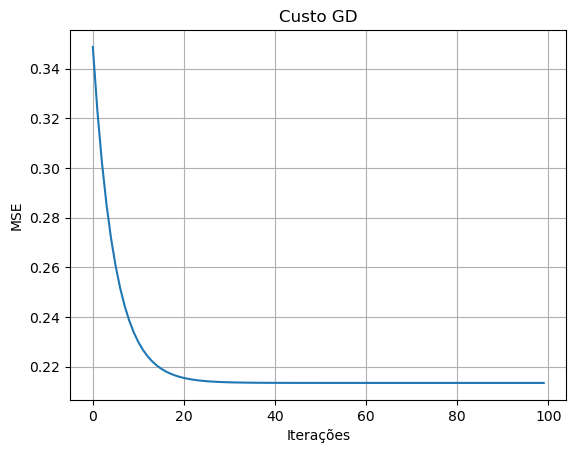

In [54]:
alpha = 1e-1
w, losses, y_pred = gradient_descent(alpha, num_epochs, X, y)

print(f"Coeficientes: {w}")
print(f"MSE: {losses[-1]:.4f}")

plt.scatter(X, y, label="Dados", alpha=0.8)
plt.plot(X, y_pred, color='red', label="Regressão Linear")
plt.xlabel("X")
plt.ylabel("y")
plt.title("GD")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(losses)
plt.title("Custo GD")
plt.xlabel("Iterações")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

c. Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.

In [27]:
def stochastic_gradient_descent(alpha, num_epochs, X, y):
    N = X.shape[0]

    X_mean, X_std = X.mean(axis=0), X.std(axis=0)
    y_mean, y_std = y.mean(), y.std()

    X_norm = (X - X_mean) / X_std
    y_norm = (y - y_mean) / y_std
    y_norm = y_norm.reshape(-1, 1)

    X_b = np.c_[np.ones((N, 1)), X_norm]
    w = np.random.randn(X_b.shape[1], 1)

    losses = []

    for epoch in range(num_epochs):
        indices = np.random.permutation(N)
        X_b_shuffled = X_b[indices]
        y_shuffled = y_norm[indices]

        for j in range(N):
            xj = X_b_shuffled[j:j+1]
            yj = y_shuffled[j:j+1]

            y_pred = xj @ w
            error = yj - y_pred

            w += alpha * error * xj.T

        y_pred_norm = X_b @ w
        y_pred = y_pred_norm * y_std + y_mean 
        mse = np.mean((y - y_pred) ** 2)
        losses.append(mse)

        print(f"Época: {epoch}; MSE: {mse:.4f}")

    print("Pesos finais (w):\n", w)
    return w, losses, y_pred

Época: 0; MSE: 2.2383
Época: 1; MSE: 1.3236
Época: 2; MSE: 0.8197
Época: 3; MSE: 0.5448
Época: 4; MSE: 0.3945
Época: 5; MSE: 0.3133
Época: 6; MSE: 0.2688
Época: 7; MSE: 0.2451
Época: 8; MSE: 0.2295
Época: 9; MSE: 0.2221
Época: 10; MSE: 0.2180
Época: 11; MSE: 0.2159
Época: 12; MSE: 0.2143
Época: 13; MSE: 0.2139
Época: 14; MSE: 0.2136
Época: 15; MSE: 0.2135
Época: 16; MSE: 0.2135
Época: 17; MSE: 0.2134
Época: 18; MSE: 0.2134
Época: 19; MSE: 0.2134
Época: 20; MSE: 0.2134
Época: 21; MSE: 0.2134
Época: 22; MSE: 0.2134
Época: 23; MSE: 0.2134
Época: 24; MSE: 0.2134
Época: 25; MSE: 0.2134
Época: 26; MSE: 0.2134
Época: 27; MSE: 0.2134
Época: 28; MSE: 0.2134
Época: 29; MSE: 0.2134
Época: 30; MSE: 0.2134
Época: 31; MSE: 0.2134
Época: 32; MSE: 0.2134
Época: 33; MSE: 0.2134
Época: 34; MSE: 0.2134
Época: 35; MSE: 0.2134
Época: 36; MSE: 0.2134
Época: 37; MSE: 0.2134
Época: 38; MSE: 0.2134
Época: 39; MSE: 0.2134
Época: 40; MSE: 0.2134
Época: 41; MSE: 0.2134
Época: 42; MSE: 0.2134
Época: 43; MSE: 0.213

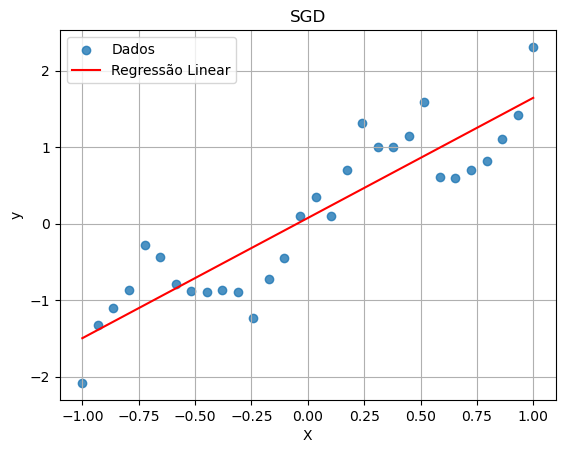

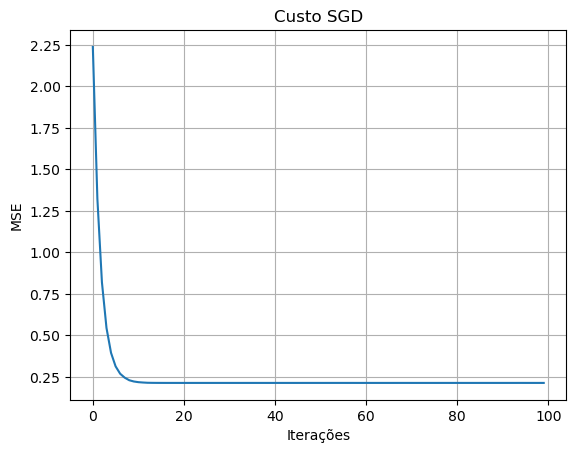

In [55]:
alpha = 1e-2
w, losses, y_pred = stochastic_gradient_descent(alpha, num_epochs, X, y)

print(f"Coeficientes: {w}")
print(f"MSE: {losses[-1]:.4f}")

plt.scatter(X, y, label="Dados", alpha=0.8)
plt.plot(X, y_pred, color='red', label="Regressão Linear")
plt.xlabel("X")
plt.ylabel("y")
plt.title("SGD")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(losses)
plt.title("Custo SGD")
plt.xlabel("Iterações")
plt.ylabel("MSE")
plt.grid(True)
plt.show()